In [1]:
import pickle

import numpy as np
from umap import UMAP

In [7]:
seed = 42

In [24]:
n_components = 250

In [3]:
site_embeddings = pickle.load(open('data/site_embeddings.pkl', 'rb'))

In [11]:
ad_embeddings = pickle.load(open('data/nuova_descr_annunci_embed.pkl', 'rb'))

In [25]:
umap_model = UMAP(n_neighbors=15, n_components=n_components, min_dist=0.0, metric='cosine', random_state=seed)

In [26]:
umap_embeddings = umap_model.fit_transform(list(site_embeddings.values()))

/Users/giovanni/PycharmProjects/auction-gym/venv/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [27]:
with open(f'data/site_embeddings_{n_components}.pkl', 'wb') as f:
    pickle.dump(dict(zip(list(site_embeddings.keys()), umap_embeddings)), f)

### Compress ad embeddings

In [29]:
ad_emb_red = umap_model.transform(list(ad_embeddings.values()))

In [30]:
with open(f'data/nuova_descr_annunci_embed_{n_components}.pkl', 'wb') as f:
    pickle.dump(dict(zip(list(ad_embeddings.keys()), ad_emb_red)), f)

## Compute cosine similarity with UMAP embeddings

In [20]:
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
site_compr_emb_160 = pickle.load(open('data/site_embeddings_160.pkl', 'rb'))
site_compr_emb_250 = pickle.load(open('data/site_embeddings_250.pkl', 'rb'))

ad_compr_emb_160 = pickle.load(open('data/nuova_descr_annunci_embed_160.pkl', 'rb'))
ad_compr_emb_250 = pickle.load(open('data/nuova_descr_annunci_embed_250.pkl', 'rb'))

### Similarity at 384 dimensions

In [32]:
similarity_384 = cosine_similarity(list(site_embeddings.values()), list(ad_embeddings.values()))

In [33]:
# Plot similarity distribution
import matplotlib.pyplot as plt
import seaborn as sns

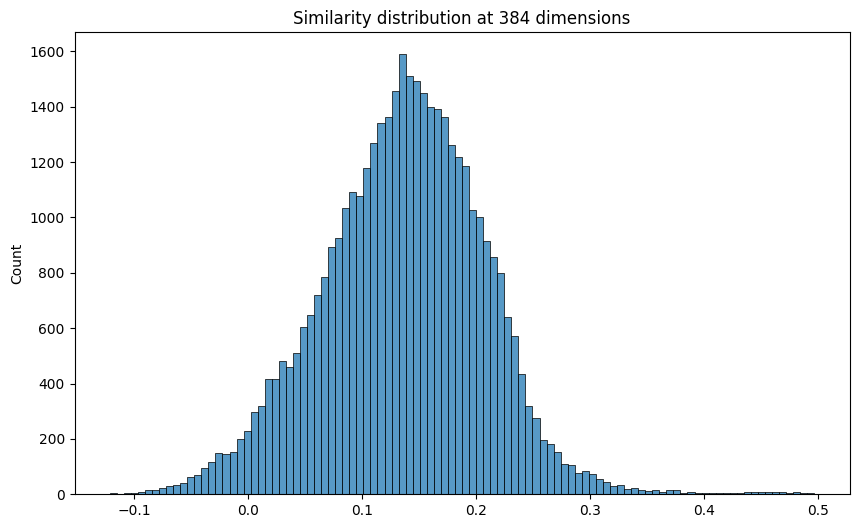

In [34]:
plt.figure(figsize=(10, 6))
sns.histplot(similarity_384.flatten(), bins=100)
plt.title('Similarity distribution at 384 dimensions')
plt.show()

In [40]:
# Quanti valori sono sotto 0?
(similarity_384 < 0).sum()/similarity_384.size

0.03249460466941338

In [41]:
# Stampa il max e il min
similarity_384.min(), similarity_384.max()

(-0.12157054446286006, 0.4964612075481324)

In [35]:
similarity_250 = cosine_similarity(list(site_compr_emb_250.values()), list(ad_compr_emb_250.values()))

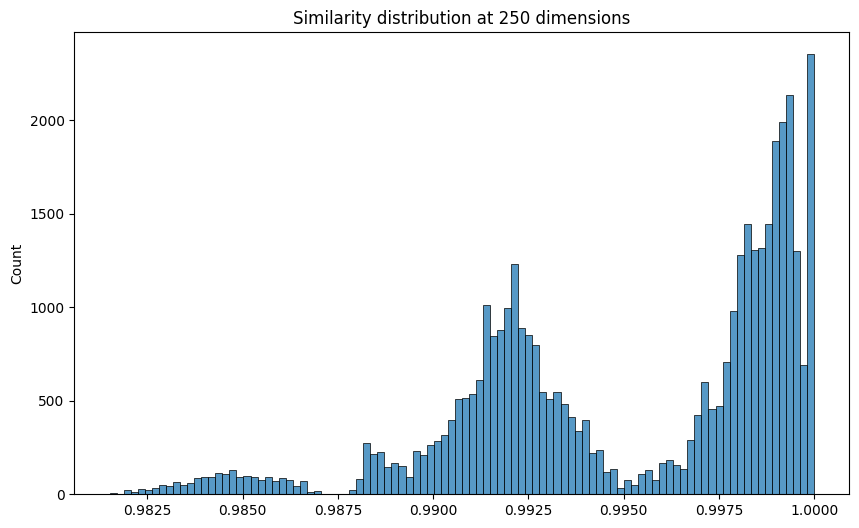

In [36]:
plt.figure(figsize=(10, 6))
sns.histplot(similarity_250.flatten(), bins=100)
plt.title('Similarity distribution at 250 dimensions')
plt.show()

In [37]:
similarity_160 = cosine_similarity(list(site_compr_emb_160.values()), list(ad_compr_emb_160.values()))

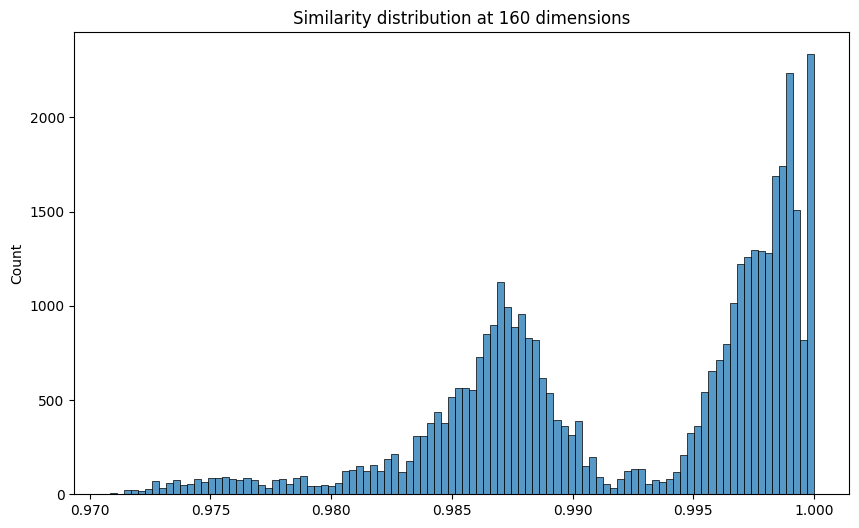

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(similarity_160.flatten(), bins=100)
plt.title('Similarity distribution at 160 dimensions')
plt.show()

## Compress ad embeddings with site embeddings

In [42]:
site_plus_ad = {**site_embeddings, **ad_embeddings}

In [43]:
site_plus_ad_compr = umap_model.transform(list(site_plus_ad.values()))

In [44]:
site_plus_ad_compr_site = site_plus_ad_compr[:len(site_embeddings)]

In [45]:
site_plus_ad_compr_ad = site_plus_ad_compr[len(site_embeddings):]

In [47]:
new_similarities = cosine_similarity(site_plus_ad_compr_site, site_plus_ad_compr_ad)

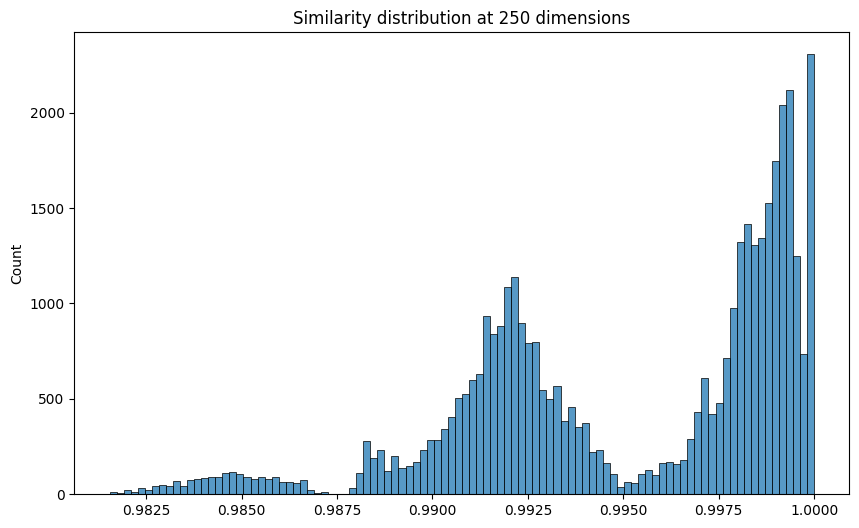

In [50]:
plt.figure(figsize=(10, 6))
sns.histplot(new_similarities.flatten(), bins=100)
plt.title('Similarity distribution at 250 dimensions')
plt.show()

### Non cambia nulla rispetto a trasformare solo gli annunci partendo dagli embeddings dei siti

## Distribuzione valori embeddings

In [56]:
import numpy as np

In [59]:
site_emb_full_array = np.array(list(site_embeddings.values()))
site_compr_emb_250_array = np.array(list(site_compr_emb_250.values()))
site_compr_emb_160_array = np.array(list(site_compr_emb_160.values()))

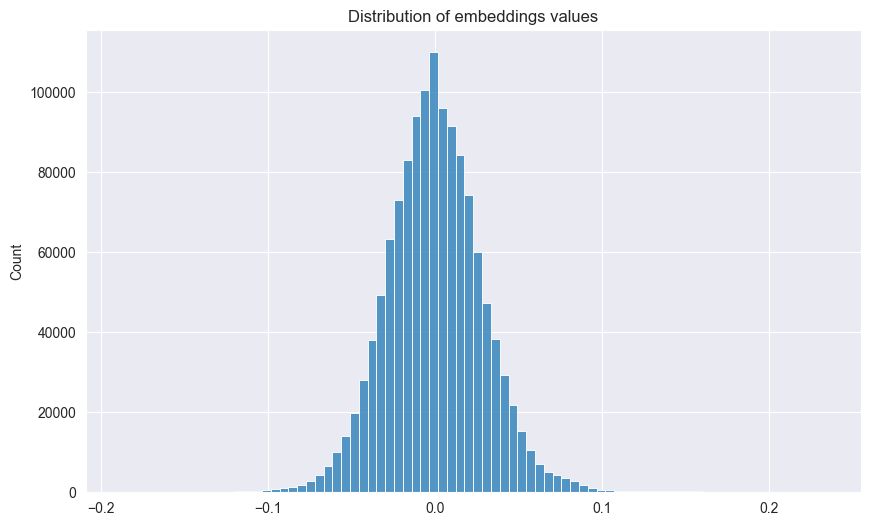

In [60]:
plt.figure(figsize=(10, 6))
sns.histplot(site_emb_full_array.flatten(), bins=80)
plt.title('Distribution of embeddings values')
plt.show()

In [63]:
# Calcola la media e la deviazione standard
site_emb_full_array.mean(), site_emb_full_array.std()

(0.00010435408808626129, 0.029419680230820335)

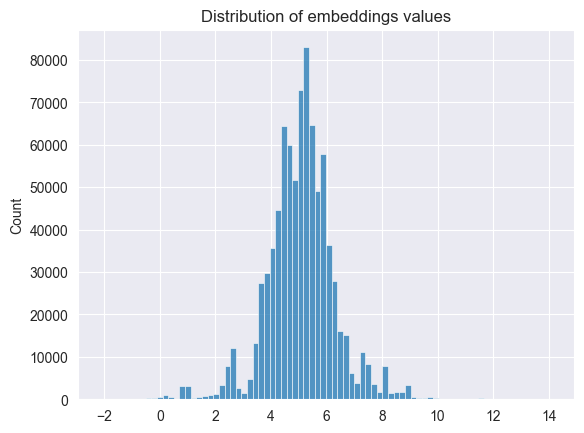

In [67]:
sns.histplot(site_compr_emb_250_array.flatten(), bins=80)
plt.title('Distribution of embeddings values')
plt.show()

In [64]:
site_compr_emb_250_array.mean(), site_compr_emb_250_array.std()

(5.086553, 1.2506185)

<AxesSubplot:ylabel='Count'>

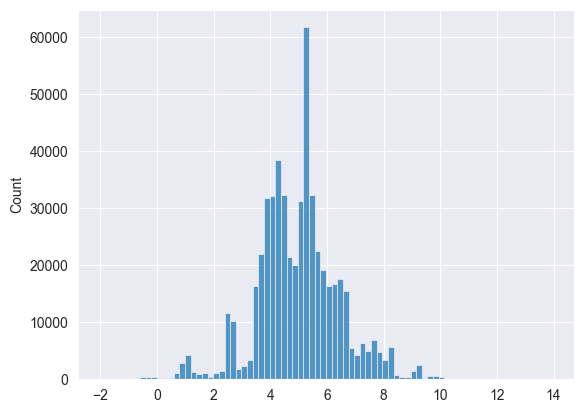

In [62]:
sns.histplot(site_compr_emb_160_array.flatten(), bins=80)

In [65]:
site_compr_emb_160_array.mean(), site_compr_emb_160_array.std()

(4.995953, 1.4902574)